# План симуляций
0. Превышение критической энергии, условие  возникновения лавины.
1. Симуляции паратметров электронной лавины без учета гамма-квантов
2. Расчет длинны нарастания лавины для разных высот и полей (делая поправку для поля на высоту)
3. Расчет средней энергии электронов, спектра электронов, зависимости от начальной энергии




In [2]:
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt
import tables
import matplotlib as mpl

In [2]:
path = "/home/zelenyy/data/thunderstorm/test/result.hdf5"
# path = "/mnt/storage2/phd/data/thunderstorm/critical_energy/result.hdf5"

In [8]:
with tables.open_file(path) as h5file:
    # print(h5file)
    for group in h5file.root:
        # print(group._v_name)
        table = h5file.get_node(group, "stacking_simple")
        # print(table.nrows)
        print(repr(table.attrs))
        # data = table.read()
        break

/sim0000/stacking_simple._v_attrs (AttributeSet), 32 attributes:
   [CLASS := 'TABLE',
    FIELD_0_FILL := 0,
    FIELD_0_NAME := 'event',
    FIELD_1_FILL := 0,
    FIELD_1_NAME := 'id',
    FIELD_2_FILL := 0,
    FIELD_2_NAME := 'parent_id',
    FIELD_3_FILL := 0,
    FIELD_3_NAME := 'particle',
    FIELD_4_FILL := 0.0,
    FIELD_4_NAME := 'energy',
    FIELD_5_FILL := 0.0,
    FIELD_5_NAME := 'theta',
    FIELD_6_FILL := 0.0,
    FIELD_6_NAME := 'radius',
    FIELD_7_FILL := 0.0,
    FIELD_7_NAME := 'z',
    FIELD_8_FILL := 0.0,
    FIELD_8_NAME := 'time',
    NROWS := 8397,
    TITLE := '',
    VERSION := '2.7',
    path := 'sim0000',
    text := '/npm/geometry/type gdml\n/npm/geometry/gdml .././gdml/0.gdml\n/npm/thunderstorm/physics standard_opt_4\n/npm/thunderstorm/minimal_energy 0.10220286877494192 MeV\n/npm/thunderstorm/stacking/electron false\n/npm/thunderstorm/stacking/positron false\n/npm/thunderstorm/stacking/gamma false\n/npm/thunderstorm/stacking/save_gamma false\n/npm/th

In [ ]:
bins = np.arange(0.001, 2, 0.001)


In [4]:
@dataclass
class CEData:
    number : int
    energy : float
    hist : np.ndarray

def select_data(table, field, height):
    m_field = table.attrs["values_gdml_field"][0]
    m_height = table.attrs["values_gdml_height"][0]
    return np.isclose([m_field, m_height], [field, height]).all()

def get_data(path, field = 0.0, height = 0.0):
    result = []
    bins = np.arange(0.001, 2, 0.001)
    with tables.open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "stacking_simple")
            if select_data(table, field, height):
                data = table.read()
                energy =  table.attrs["values_macros_energy"]
                number =  table.attrs["values_macros_number"]
                hist, _ = np.histogram(data["energy"], bins=bins)
                result.append(CEData(number, energy, hist))
    return result, bins

In [9]:
ce_list, bins = get_data(path, field=0.00030000000000000003)

In [10]:
ce_list = sorted(ce_list, key=lambda x: x.energy)

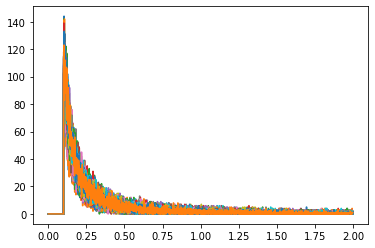

In [11]:
for item in ce_list:
    plt.step(bins[:-1], item.hist)

In [12]:
for item in ce_list:
    print(item.hist.sum()/item.number, ce_list.index(item))

79.86 0
68.07 1
89.99 2
100.51 3
96.18 4
98.94 5
88.9 6
101.45 7
106.35 8
103.53 9
107.26 10
101.54 11
106.77 12
114.34 13
107.86 14
114.07 15
109.81 16
115.8 17
106.98 18
111.38 19
116.74 20
114.67 21
115.76 22
114.34 23
114.95 24
117.02 25
113.99 26
111.22 27
116.27 28
120.65 29
120.5 30
117.07 31
117.5 32
119.6 33
116.36 34
117.33 35
118.43 36
115.26 37
117.67 38
116.91 39
118.5 40
119.42 41
118.51 42
120.45 43
118.5 44
120.67 45
119.03 46
116.21 47
117.93 48
116.74 49
119.45 50
119.29 51
117.85 52
114.88 53
118.65 54
115.35 55
116.93 56
118.76 57
115.05 58
119.03 59
119.02 60
117.2 61


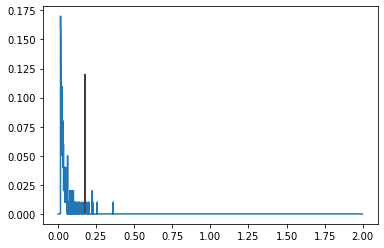

In [65]:
item = ce_list[-1]
n = 100
plt.step(bins[:-1], item.hist/item.number)
plt.vlines(item.energy, 0, 0.12)

In [3]:
def get_data_event(path, field = 0.0, height = 0.0):
    result = []
    with tables.open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "stacking_simple")
            if select_data(table, field, height):
                data = table.read()
                energy =  table.attrs["values_macros_energy"]
                number =  table.attrs["values_macros_number"]
                _, temp  = np.unique(data["event"], return_counts=True)
                result.append(CEData(number, energy, temp))
    return result

In [11]:
event_list = get_data_event(path, field=9e-4)

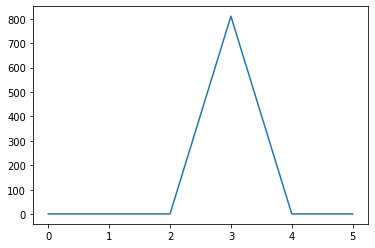

In [14]:
item = event_list[28]
plt.plot(item.hist)

In [13]:
def get_data_z(path, field = 0.0, height = 0.0):
    result = []
    bins = np.arange(-500.0, 501, 1)
    with tables.open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "stacking_simple")
            if select_data(table, field, height):
                data = table.read()
                energy =  table.attrs["values_macros_energy"]
                number =  table.attrs["values_macros_number"]
                temp, _ = np.histogram(data["z"], bins=bins)
                temp = np.cumsum(temp)
                result.append(CEData(number, energy, temp))
    return result

In [17]:
z_list = get_data_z(path, field=11e-4)


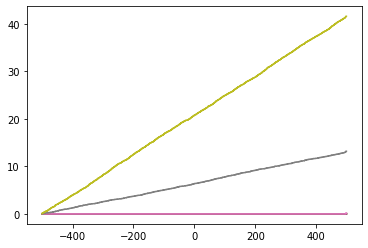

In [18]:
bins = np.arange(-500.0, 501, 1)
for item in z_list:
    plt.step(bins[:-1], item.hist/item.number)

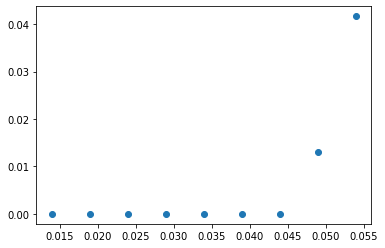

In [19]:
from scipy.linalg import lstsq

bins = np.arange(-500.0, 501, 1)
energy = []
k = []
for item in z_list:
    x = bins[:-1]
    y = item.hist/item.number
    M = x[:, np.newaxis]**[0, 1]
    p, res, rnk, s = lstsq(M, y)
    energy.append(item.energy)
    k.append(p[1])
plt.plot(energy, k, "o")





